# 2 ライブラリとデータの作成

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [2]:
x_train = np.random.normal(5, 1, 100)
t_train = 3*x_train + 2 + np.random.randn(100)
# x_train = (x_train - x_train.mean())/x_train.std()
# t_train = (t_train - t_train.mean())/t_train.std()

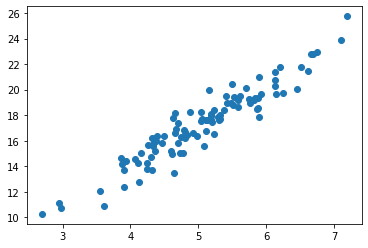

In [3]:
plt.scatter(x_train,t_train)

# 3 モデル

In [4]:
class Optimizer:
    def step(self, lr):
        self.w -= lr * self.dw
        self.b -= lr * self.db
        
class Linear(Optimizer):
    def __init__(self):
        self.w = np.random.randn(1)
        self.b = np.random.randn(1)
    def forward(self,x):
        self.x = x
        self.y = self.w*x + self.b
        return self.y
    def backward(self, dy):       
        self.dw = np.dot(dy, self.x)
        self.db = dy.sum()
        
class Loss:
    def forward(self, y, t):
        self.y = y
        self.t = t
        L = sum((y-t)**2)/len(t)
        return L
    def backward(self):
        dy = 2*(self.y - self.t) / len(self.t)
        return dy

In [5]:
model_ob = Linear()
loss_ob = Loss()
def model(x):
    y = model_ob.forward(x)
    return y
def loss(y,t):
    L = loss_ob.forward(y,t)
    return L
def backward():
    dy = loss_ob.backward()
    model_ob.backward(dy)
def optimizer(lr):
    model_ob.step(lr)

# 4 モデルの学習

In [6]:
batch_size = 10
batch_n = len(x_train) // batch_size
batch_index = np.arange(len(x_train))

loss_all = []

for epoch in range(1, 100 + 1):
    
    np.random.shuffle(batch_index)
    
    for n in range(batch_n):
        mb_index = batch_index[n*batch_size:(n+1)*batch_size]
        y = model(x_train[mb_index])
        loss_train = loss(y,t_train[mb_index])
        backward()
        optimizer(1e-3)
    
    loss_all.append(loss_train)

    if epoch == 1 or epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss {loss_train:.4f}")

Epoch 1, Loss 117.1480
Epoch 20, Loss 1.3051
Epoch 40, Loss 0.4573
Epoch 60, Loss 0.4151
Epoch 80, Loss 0.6710
Epoch 100, Loss 0.6179


# 5 結果の可視化

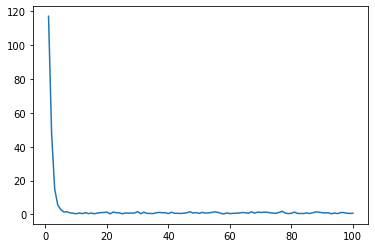

In [7]:
plt.plot(range(1,len(loss_all)+1), loss_all)

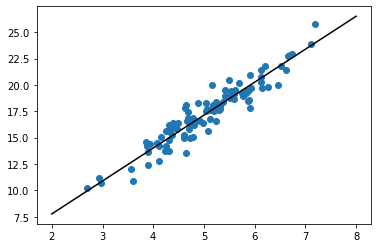

In [8]:
x = np.arange(2,9)
y = model(x)
plt.plot(x,y, color="black")
plt.scatter(x_train,t_train)